# Testing the imaginary time propagator to find eigenstates

In [1]:
from numba import njit # compile python
import matplotlib.pyplot as plt # plotting facility
import numpy as np

from imag_time_propagation import ImgTimePropagation

In [2]:
# Changing the default size of all the figures 
plt.rcParams['figure.figsize'] = [15, 11]

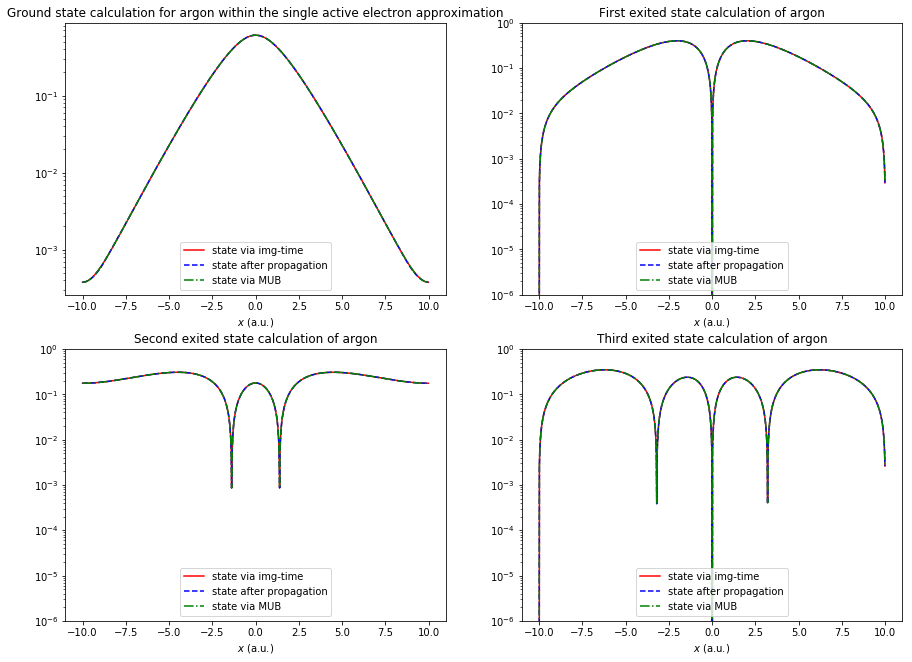

In [3]:
# specify parameters separately
@njit
def v(x, t=0.):
    """
    Potential energy
    """
    return -1. / np.sqrt(x ** 2 + 1.37)

@njit
def k(p, t=0.):
    """
    Non-relativistic kinetic energy
    """
    return 0.5 * p ** 2

atom_params = dict(
    x_grid_dim=1024,
    x_amplitude=10.,
    dt=0.05,
    k=k,
    v=v,
)

# construct the propagator
atom_sys = ImgTimePropagation(**atom_params)

# find the ground and first excited states via the imaginary time method
atom_sys.get_stationary_states(4)

# get "exact" eigenstates by diagonalizing the MUB hamiltonian
from mub_qhamiltonian import MUBQHamiltonian
atom_mub = MUBQHamiltonian(**atom_params)

plt.subplot(221)
plt.title("Ground state calculation for argon within the single active electron approximation")

# set the ground state (obtained via the imaginary time propagation) as the initial condition
atom_sys.set_wavefunction(atom_sys.stationary_states[0])

plt.semilogy(
    atom_sys.x,
    atom_sys.wavefunction.real,
    'r-',
    label='state via img-time'
)
plt.semilogy(
    atom_sys.x,
    np.abs(atom_sys.propagate(10000)),
    'b--',
    label='state after propagation'
)
plt.semilogy(
    atom_sys.x,
    atom_mub.get_eigenstate(0).real,
    'g-.',
    label='state via MUB'
)
plt.xlabel("$x$ (a.u.)")
plt.legend(loc='lower center')

plt.subplot(222)
plt.title("First exited state calculation of argon")

# set the first excited state (obtained via the imaginary time propagation) as the initial condition
atom_sys.set_wavefunction(atom_sys.stationary_states[1])

plt.semilogy(
    atom_sys.x,
    np.abs(atom_sys.wavefunction),
    'r-',
    label='state via img-time'
)
plt.semilogy(
    atom_sys.x,
    np.abs(atom_sys.propagate(10000)),
    'b--',
    label='state after propagation'
)
plt.semilogy(
    atom_sys.x,
    np.abs(atom_mub.get_eigenstate(1)),
    'g-.',
    label='state via MUB'
)
plt.ylim([1e-6, 1e0])
plt.xlabel("$x$ (a.u.)")
plt.legend(loc='lower center')

plt.subplot(223)
plt.title("Second exited state calculation of argon")

# set the second excited state (obtained via the imaginary time propagation) as the initial condition
atom_sys.set_wavefunction(atom_sys.stationary_states[2])

plt.semilogy(
    atom_sys.x,
    np.abs(atom_sys.wavefunction),
    'r-', label='state via img-time'
)
plt.semilogy(
    atom_sys.x,
    np.abs(atom_sys.propagate(10000)),
    'b--',
    label='state after propagation'
)
plt.semilogy(
    atom_sys.x,
    np.abs(atom_mub.get_eigenstate(2)),
    'g-.',
    label='state via MUB'
)
plt.ylim([1e-6, 1e0])
plt.xlabel("$x$ (a.u.)")
plt.legend(loc='lower center')

plt.subplot(224)
plt.title("Third exited state calculation of argon")

# set the third excited state (obtained via the imaginary time propagation) as the initial condition
atom_sys.set_wavefunction(atom_sys.stationary_states[3])

plt.semilogy(
    atom_sys.x,
    np.abs(atom_sys.wavefunction),
    'r-',
    label='state via img-time'
)
plt.semilogy(
    atom_sys.x,
    np.abs(atom_sys.propagate(10000)),
    'b--',
    label='state after propagation'
)
plt.semilogy(
    atom_sys.x,
    np.abs(atom_mub.get_eigenstate(3)),
    'g-.',
    label='state via MUB'
)
plt.ylim([1e-6, 1e0])
plt.xlabel("$x$ (a.u.)")
plt.legend(loc='lower center')

plt.show()